# Regresja liniowa

Regresja jest podstawową i jednocześnie najbardziej popularną techniką w analityce. Służy ona wykazaniu/zmierzeniu, czy istnieje relacja pomiędzy dwiema lub wieloma zmiennymi. W ramach regresji staramy się najlepiej dopasować linię, do obserwowanych danych, aby zmniejszyć błąd pomiędzy rzeczywistym, a przewidywanym punktem danych. 

Regresja jest znana od ponad dwustu lat. I sama w sobie stanowi podstawę dla wielu innych technik machine learningowych, jak sieci neuronowe, czy regresja logistyczna. 

Regresja jest fundamentem dla wielu algorytmów z rodziny nadzorowanego uczenia maszynowego.

## Podstawowa regresja liniowa

Dlaczego regresj liniowa jest przydatna?

Pozwala przewidywać dane, których wcześniej nie zaobserwowaliśmy. Jeśli wykreślimy (obliczymy) regresję liniową na podstawie jakiegoś zbioru danych, to gdy pojawi się nowy punkt danych, możemy na jej podstawie oszacować, jaką wartość będzie mieć w zmiennej zależnej (y). 

Dodatkowo, dzięki regresji, możemy przyjrzeć się, czy pomiędzy parami zmiennych wsystępują korelacje, a nawet zweryfikować występowanie związku przyczynowo-skutkowego. 

## Niebezpicezństwa regresji liniowej

To, o czym warto pamiętać (oprócz oczywistości, że regresja na prawdziwych danych prawie nigdy nie będzie pozwalała na ułożenie danych równo na linii), to również fakt, że nie powinniśmy przewidywać na nowych danych (np. x>8), które wykraczają poza zakres danych wejściowych (np. 2 do 8). 

Aby regresja liniowa, była miarodajna, konieczne jest również sprawdzanie, a jaki sposób zostały pozyskane dane, czy np. próba nie jest jakoś obciążona (błąd autoselekcji). 

## Budowa regresji liniowej z sklearn

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv, qr
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import numpy as np

In [2]:
# dane
data = load_diabetes()

data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
# podzial zmienna zalezna, i zmienne niezalezne
# konwersja do arrayów
X = df.values[:, :-1] #wszystkie wiersze oprocz ostatniej kolumny
y = df.values[:, -1] #tylko ostatni wiersz

In [7]:
# dopasowujemy linię regresji
dop = LinearRegression(). fit(X,y)
m = dop.coef_.flatten()
b = dop.intercept_.flatten()

In [8]:
print(f"""m= {m} 
b= {b}""")

m= [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639] 
b= [152.13348416]


## Reszty i kwadraty błędu - dopasowanie linii regresji

Czym są reszty (błędy)?

Reszty to odległość pomiędzy punktami danych i linią regresji. Czyli rzeczywistym punktem danych, a predykcją. Jeśli punkt danych znajduje się ponad linią, mamy resztę dodatną. Natomiast jeśli znajduje się pod linią, mamy resztę ujemną.

Poniżej widzimy regresję liniową z punktami danych i kreskowanymi liniami ilustrującymi reszty.

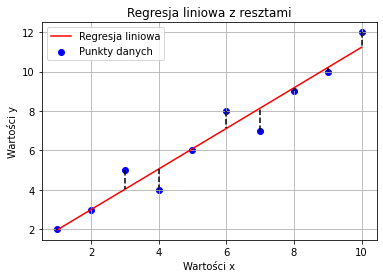

In [9]:

# Przykładowe dane (możesz je dostosować do swoich potrzeb)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 3, 5, 4, 6, 8, 7, 9, 10, 12])

# Obliczamy współczynniki regresji liniowej
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)

# Rysujemy wykres
plt.scatter(x, y, label='Punkty danych', color='b')
plt.plot(x, line(x), 'r', label='Regresja liniowa')

# Obliczamy reszty
residuals = y - line(x)

# Rysujemy linie kreskowane dla reszt
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], line(x[i])], 'k--')

plt.xlabel('Wartości x')
plt.ylabel('Wartości y')
plt.title('Regresja liniowa z resztami')
plt.legend()
plt.grid(True)
plt.show()


## Obliczanie reszt kwadartu

In [10]:
points = df[['bmi', 'target']].head(10)
points

,bmi,target
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
5,-0.040696,97.0
6,-0.047163,138.0
7,-0.001895,63.0
8,0.061696,110.0
9,0.039062,310.0


Zwróć uwagę, że przy datasecie, który ma tylko dwie kolumny, przy jego slice, zwraca nam się jednowymiarowa tablica (series). Jednak sklearn wymaga do modelów tablic dwuwymiarowych. Dlatego też konieczne jest przekształcenie jednowymiarowych tablic (poprzez reshape) do tablic dwuwymiarowych).

In [11]:
df.bmi.values[:10]

array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215])

In [12]:
points_X = df.bmi.values.reshape(-1,1)
points_y = df.target.values.reshape(-1,1)

In [13]:
points_X[:10]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215]])

In [14]:
# Dopasowujemy linie regresji
lin_reg = LinearRegression().fit(points_X, points_y)
m = lin_reg.coef_.flatten() #pobieramy informacje o nachyleniu i splaszczamy do jednego wymiaru
b = lin_reg.intercept_.flatten() #pobieramy informacje o przecieciu i splaszczamy


In [15]:
# Sprawdzmy wartosci m i b
m, b

(array([949.43526038]), array([152.13348416]))

In [16]:
# Obliczamy reszty
for p in points.itertuples():
    y_rzeczywista = p.target
    y_przewidywana = m*p.bmi + b # po prawej mamy wzor na regresje liniowa
    reszta = y_rzeczywista - y_przewidywana # wzor na obliczenie residuals (reszt)
    print(reszta)

[-59.71003806]
[-28.26219543]
[-53.33703347]
[64.87523145]
[17.41142555]
[-16.4953233]
[30.64455342]
[-87.33458363]
[-100.71003806]
[120.77953046]


Aby jak najlepiej dopasować linię regresji, konieczna jest minimalizacja łącznej wielkości tych reszt. Łączną wartość obliczamy (najczęściej) poprzez obliczenie sumy kwadratów. 

Wartości podniesione do kwadratu (a nie np. bezwględne) przyjmuje zwyczajowo najczęściej do obliczania najlepiej dopasowanej linii regresjii. Drugim powodem jest fakt, że wartości bewzględne słabo współpracują z pochodnymi, które później używamy w gradiencie prostym. 

Zsumujmy sumy kwadratów:



In [17]:
suma_kwadratow = 0.0
for p in points.itertuples():
    y_rzeczywista = p.target
    y_przewidywana = m * p.bmi + b
    reszta_do_kwadratu = (y_rzeczywista - y_przewidywana) ** 2
    suma_kwadratow += reszta_do_kwadratu
print(f'suma kwadratow = {suma_kwadratow}')

suma kwadratow = [45289.5534603]


## Znajdowanie najlepiej dopasowanej linii

Obliczyliśmy sumę kwadratów reszt. Mamy zatem metrykę, która pozwala na stwierdzenie, jak dopasowana jest linia regresji do danych. Jednak, jak znaleźć wartości m i b, które dadzą nam najmeniejszą wartość sumy kwadratów reszt? 

Jest na to kilka sposób:
* równanie w formie zamkniętej,
* odwracanie macierzy,
* rozkład macierzy,
* metoda gradientu prostego,
* metoda gradientu stochastycznego.

Istnieją inne algorytmy na wyszukiwanie wartości m i b, jednak tutaj weźmiemy na warsztat te najbardziej popularne.

### Równanie w formie zamkniętej

Jeśli mamy do czynienia z prostą regresją liniową (czyt. z jedną zmienną wejściową), to możemy znaleźć odpowiednie wartości m i b z pomocą równania w formie zamkniętej. 

Poniżej mamy wzór na $m$ i $b$ wg równania w formie zamkniętej:

$\ m = \frac{n \sum xy - \sum x \sum y}{\sum x^2 - (\sum x)^2} \
$

$b = \frac {\sum y} {n} - m \frac {\sum x} {n}
$

Obliczmy to w pythonie:

In [18]:
punkty = list(points.itertuples())
n = len(punkty)

In [19]:
m = (n * sum(p.bmi * p.target for p in punkty) - 
     sum(p.bmi for p in punkty) * sum(p.target for p in punkty)) / (
    n * sum(p.bmi ** 2 for p in punkty) - sum(p.bmi for p in punkty) ** 2)

In [20]:
b = (sum(p.target for p in punkty) / n) - m * sum(p.bmi for p in punkty) / n

In [21]:
m, b

(535.7409619569211, 141.65181606678237)

Powyższe wzory są wyprowadzane z rachunku różniczkowego i całkowego. 
Niestety nie skalują się one dobrze przy większej ilości zmiennych wejściowych. 
Więcej na ten temat w filmach: 'P vs. NP and the computational complexity zoo' oraz 'what is a big o notation'.

### Techniki wykorzystujące macierze odwrotne

Aby dopasować linię regresjii, możemy wykorzystać równieże macierze transponowane i odrowtne. 
Wyprowadzenie wzoru wymaga zagłębienia się w rachunek całkowy i różniczkowy. Dla uproszczenia możemy skorzystać z następującego wzoru:

$b = (X^T \cdot X)^-1 \cdot X^ T \cdot y$

Na macierzy X przeprowadzane są operacje transpozycji i inwersji, a także mnożenie macierzy.



*Alternatywną metodą notacji dla $m$ i $b$ jest odpowiednio $\beta_1$ i $\beta_0$*

In [22]:
# Ponownie korzystamy z naszego df
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


### Obliczanie beta_0(wyraz wolny) i beta_1 (nachylenie) z pomocą macierzy odrowtnych i transponowanych

In [23]:

# Wyodrebniamy zmienne wejsciowe
X = df[['bmi']][:2].values
np.shape(X)

(2, 1)

In [24]:
# Dodajemy kolumne o wartosci 1 - wyraz wolny (b)
X_1 = np.hstack([X, np.ones((X.shape[0], 1))])
X_1

array([[ 0.06169621,  1.        ],
       [-0.05147406,  1.        ]])

In [25]:
np.shape(X_1)

(2, 2)

In [26]:
# Wyodrebiamy kolumne wyjsciowa
y = df.values[:2, -1]
np.shape(y)

(2,)

In [27]:
# Obliczamy współczynnik dla nachylenia (m) i wyrazu wolnego (b)
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() * y)
b

array([[1334.27271131, -662.71823409],
       [  68.68043525,   40.88720103]])

In [28]:
# Przewidywanie wartosci y
y_predicted = X_1.dot(b)
y_predicted

array([[ 1.51000000e+02,  2.84217094e-14],
       [-2.84217094e-14,  7.50000000e+01]])

### Obliczanie wyrazu wolnego (beta_0) i nachylenia (beta_1) z pomocą rozkładu macierzy QR

W przypadku, gdy danych jest więcej, a regresja dotyczy więcej niż jednej zmiennej wejściowej, może zachodzić ryzyko błędu w oblczeniach i niestabilnych wyników. W takim przypadku przydaje się rozkład macierzy. 

W przypadku rozkładu macierzy bierzemy macierz, dołączamy do niej kolumnę jedynek (wyraz wolny), a następnie rozkładamy ją na macierze Q i R.

$X = Q \cdot R$

Z macierzy b (powyżej) możemy obliczyć wartości współczynników beta ($\beta_1 (m) \beta_0 (b)$), w następujący sposób:

$b = R^-1 \cdot Q^T \cdot y$

Poniżej przykład jak użyć powyższego wzoru, aby przeprowadzić regresję liniową:

In [91]:
X = df.values[:2,:1]

In [92]:
np.shape(X)

(2, 1)

In [93]:
# dodajemy kolumne o wartosci 1, aby wygenerowac wyraz wolny
X_1 = np.hstack([X, np.ones((X.shape[0], 1))]).T
X_1

array([[ 0.03807591, -0.00188202],
       [ 1.        ,  1.        ]])

In [94]:
np.shape(X_1)

(2, 2)

In [95]:
# wyodrebninie kolumny wyjsciowej
y = df.values[:2, -1]
y

array([151.,  75.])

In [96]:
np.shape(y)

(2,)

In [97]:
# obliczenie nachylenia i wyrazu wolnego z pomoca rozkladu QR
Q, R = qr(X_1)
b = inv(R).dot(Q.T).dot(y)
b

array([ 3782.50769907, -3707.50769907])

Rozkład QR jest często wykorzystywany do regresji liniowej przez biblioteki naukowe, ze względu na to, że dobrze radzi sobie z dużą ilością danych. Komputery mają ograniczoną liczbę miejsc dziesiętnych, stąd muszą przybliżać wartości, co może pogarszać jakość algorytmu poprzez błędy w przybliżeniach. 